<a href="https://colab.research.google.com/github/ChapeuG/Imersao-Dados-Alura/blob/main/Notebook/Desafio_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Como funcionará? **
A partir do desafio proposto, desenvolver uma análise dos dados ENEM-2019 (seja com a base completa, uma amostra aleatória ou dados de um estado ou cidade específica) criando um notebook no Google Collaboratory para submissão. Você pode utilizar fontes extras de dados, para enriquecer suas análises e o desenvolvimento de modelos de machine learning é opcional. 


Segue os critérios que serão levados em consideração no momento da avaliação:

*   O notebook tem uma narrativa convincente e coerente?
*   O notebook contém visualizações de dados que ajudam na argumentação dos pontos principais do autor?
*  As argumentações foram baseadas nos dados fornecidos ou fontes extras?
*   O autor incluiu um resumo das conclusões coerente com as análises ao longo do projeto?
*   O autor foi criativo e inovador em suas soluções e conclusões?

#QUESTIONAMENTO

Antes de iniciar a nossa análise de dados, vamos a algumas perguntas.
 
Estamos constantemente sendo bombardeados sobre a desigualdade social na nossa sociedade, mas será que possuímos uma visão clara de como essa desigualdade afeta as pessoas ? 
 
Vamos pegar uma das maiores provas do Brasil e que acaba definindo o futuro de muitos estudantes para sua vida acadêmica e profissional


#Importação de Bibliotecas


In [ ]:
#bibliotecas que vamos utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sys
from IPython.display import Image

##Importação de Bibliotecas Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

#Nosso bando(ops banco) de dados

In [ ]:
#importante o nosso banco de dados

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


#Funções

##Gráficos

In [ ]:
#Uma função para gerar um gráfico boxplot de forma mais agil
def gera_boxplot_legenda(eixo_x,eixo_y, dados,titulo, leganda_x, legenda_y):
    plt.figure(figsize=(54, 8))
    plt.subplot(1, 2, 1)
    sns.boxplot(x= eixo_x, y = eixo_y, data =dados,order= renda_ordenada)
    plt.title(titulo, size = 15, color = "#6495ED")
    plt.ylabel(leganda_x, size = 15)
    plt.xlabel(legenda_y, size = 15)
    plt.show()

def nota():
  plt.figure(figsize=(14, 8))
  ax = sns.boxplot(x="TP_COR_RACA", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero)
  ax.set_xlabel('Raça')
  ax.set_ylabel('Nota Total')
  ax.set_title("Boxplot da nota total por raça")
  ax.set_xticklabels(racas)
  plt.show()

def seu_estado():
  count = dados_estado["TP_SEXO"].value_counts().values
  sexo = dados_estado["TP_SEXO"].value_counts().index

  #ordenando a renda da menor para maior, sendo que A é a menor renda e Q a maior
  renda_ordenada = dados_estado["Q006"].unique()
  renda_ordenada.sort()

  provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
  dados_estado[provas].sum()

  dados_estado["NU_NOTA_TOTAL"] = dados_estado[provas].sum(axis=1)

  dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")

  plt.figure(figsize = (24, 4))
  plt.subplot(1, 2, 1)
  plt.bar(sexo, count,color = "#B0C4DE")
  plt.xlabel("Sexo")
  plt.title("Sexo")
  plt.legend()

  dados_estado['TXT_COR_RACA']=pd.cut(
    dados_estado['TP_COR_RACA'],
    bins=[-1, 0, 1, 2, 3, 4, 5],
    labels=['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
  )

  count_cor = dados_estado["TXT_COR_RACA"].value_counts().values
  cor_raca = dados_estado["TXT_COR_RACA"].value_counts().index

  plt.subplot(1, 2, 2)
  plt.bar(cor_raca, count_cor, ec = "k", alpha = .6, color = "#006400")
  plt.xlabel("Cor/Raça")
  plt.title("Cor/Raça")
  plt.legend()

  gera_boxplot_legenda("Q006", "NU_NOTA_TOTAL",dados_sem_notas_zero,"Nota por Renda Social","Nota Total","Renda")

##Machine Learning

In [ ]:
def regressor_arvore(nivel):
    SEED= 1232
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(max_depth=nivel)
    resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Treino = {(resultados['train_score']*-1).mean()}|Teste = {(resultados['test_score']*-1).mean()}")

def calcula_mse(resultados):
    media = (resultados["test_score"]*-1).mean()
    desvio_padrao = (resultados["test_score"]*-1).std()
    lim_inferior = media - (2*desvio_padrao)
    lim_superior = media + (2*desvio_padrao)
    print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

#Primeira análise


A base de dados do Enem nos fornece inumeras informações para trabahar, contudo atente se  que não estamos usando a base completa e sim a que foi dispnibilizada que se encontra [AQUI](https://github.com/alura-cursos/imersao-dados-2-2020)(até porque trabalhar com quase 3 gigas é muito)

eu vou estar utilizando algumas delas e explicando o motivo do uso ao longo de cada análise(vou deixar também um link das referências e dados que utilizei)

In [ ]:
resposta = int(input("""
  para saber a resposta das perguntas abaixo digite o numero delas.
  1-Deseja saber quais colunas existe na nossa base de dados? \n
  2- Deseja saber quais Estados possuem estudantes que fizeram o Enem? \n
  3- Quer saber quantos participantes tem por Estado? \n
"""))
if resposta == 1:
    print(dados.columns.values)
if resposta == 2:
  print("temos {} estados".format(len(dados["SG_UF_RESIDENCIA"].unique())))
  print(dados["SG_UF_RESIDENCIA"].unique())
if resposta == 3:
   print(pd.DataFrame(dados["SG_UF_RESIDENCIA"].value_counts()))
else:
  print()


  para saber a resposta das perguntas abaixo digite o numero delas.
  1-Deseja saber quais colunas existe na nossa base de dados? 

  2- Deseja saber quais Estados possuem estudantes que fizeram o Enem? 

  3- Quer saber quantos participantes tem por Estado? 

0



##Vamos fazer uma analise geral pela Idade, Sexo, Cor e Renda

In [ ]:
count = dados["TP_SEXO"].value_counts().values
sexo = dados["TP_SEXO"].value_counts().index

#ordenando a renda da menor para maior, sendo que A é a menor renda e Q a maior
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()

provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
dados[provas].sum()

dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)

dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")

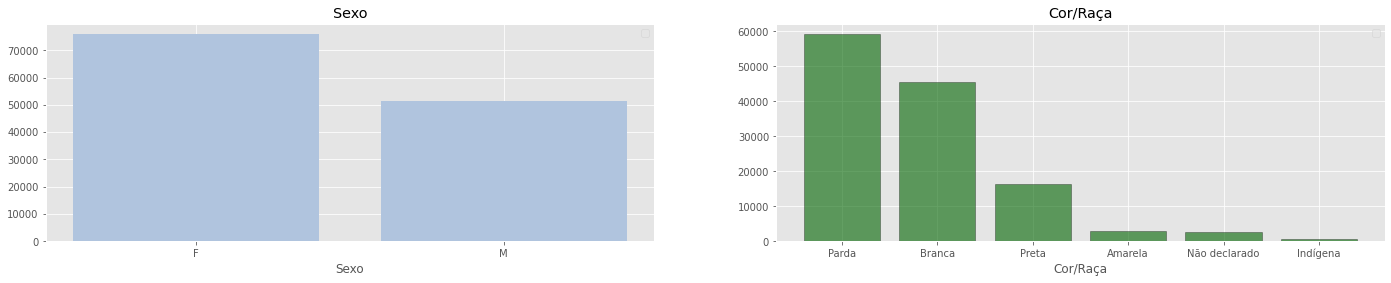

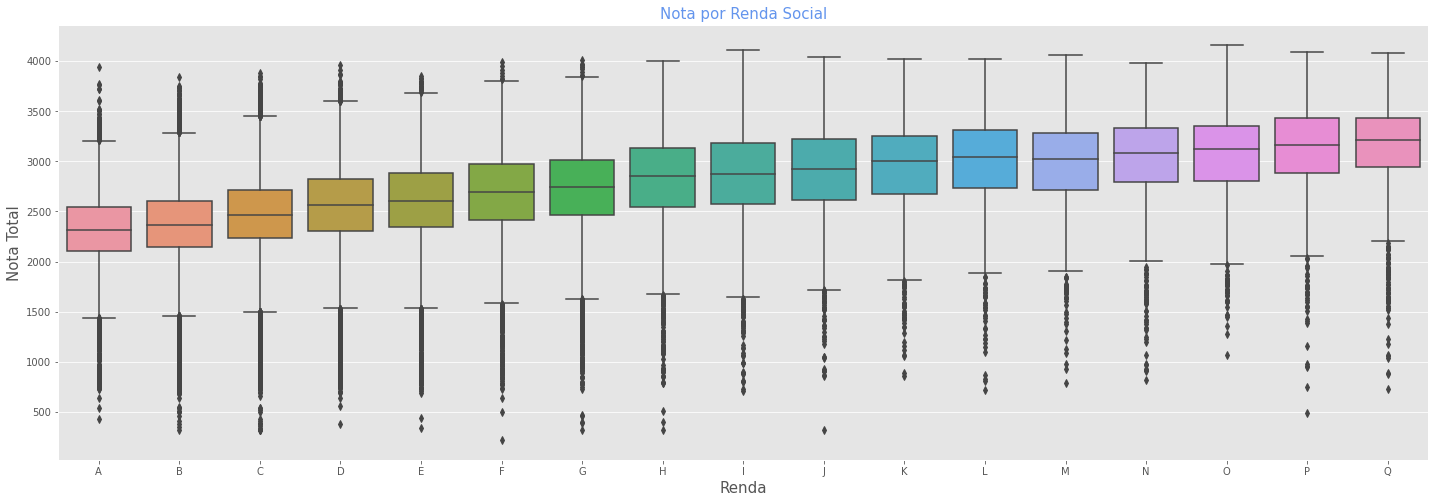

In [ ]:
plt.figure(figsize = (24, 4))
plt.subplot(1, 2, 1)
plt.bar(sexo, count,color = "#B0C4DE")
plt.xlabel("Sexo")
plt.title("Sexo")
plt.legend()

dados['TXT_COR_RACA']=pd.cut(
   dados['TP_COR_RACA'],
   bins=[-1, 0, 1, 2, 3, 4, 5],
   labels=['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
)

count_cor = dados["TXT_COR_RACA"].value_counts().values
cor_raca = dados["TXT_COR_RACA"].value_counts().index

plt.subplot(1, 2, 2)
plt.bar(cor_raca, count_cor, ec = "k", alpha = .6, color = "#006400")
plt.xlabel("Cor/Raça")
plt.title("Cor/Raça")
plt.legend()

gera_boxplot_legenda("Q006", "NU_NOTA_TOTAL",dados_sem_notas_zero,"Nota por Renda Social","Nota Total","Renda")

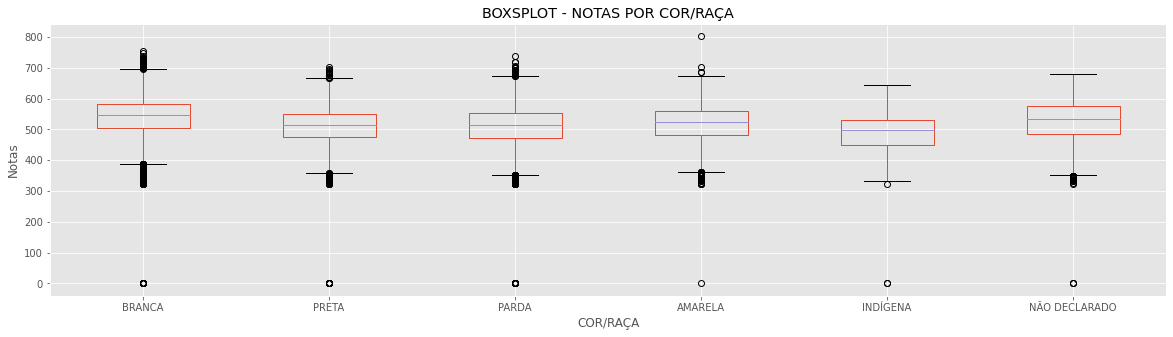

In [ ]:
nota()

Mas Gabriel, o que esses gráficos representam ?

In [ ]:
Image(url='https://miro.medium.com/max/490/0*cBSeArnwoU_FRso7.gif')

O primeiro grafico SEXO, representa a quantidade de pessoas do sexo masculino e feminino fazendo Enem e o mesmo vale para o grafico ao lado, porém ele faz contagem por Cor/ Raça.
 
Esses dois gráficos servem para analisar se encontramos analisar a nota, renda, acesso  internet pelo sexo e/ou cor.
 
Os dois gráficos abaixos são uma representação em relação a ** nota pela renda social** onde a verdade é o que já esperamos é quanto maior a renda maior será a Nota. 
 
No gráfico de Notas por Cor/Raça temos a mesma similaridade, onde a maior concentração de notas acima de 500 estão nas pessoas Brancas (o que podemos assimilar com a renda da grande maioria das pessoas brancas)

Feito essas análises rápidas temos 2 caminhos, podemos aprofundar em cima de cada tópico(Sexo, Cor/Raça,Idade e Socioêconomico) ou basear hipóteses em cima da análise rápida.

Eu optei por aprofundar um pouco mais de forma bem simples :)

#Análises

##Idade

Mas como assim, como a idade pode ser um fator que pode diferenciar socialmente  as pessoa ?

Calma, eu te explico.

Vamos fazer essa nossa análise com os famosos treineiros, aqueles joven que vão fazer a prova para saber como funciona.

In [ ]:
Image(url='https://media.giphy.com/media/elhHndVfpU1621gcEJ/giphy.gif')

Vamos dar uma olhada na Renda por treineiro e não treineiro ?

In [ ]:
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()
d1 = dados.query("IN_TREINEIRO == 1")
renda_treineiro = d1["Q006"].value_counts()
d2 = dados.query("IN_TREINEIRO == 0")
renda_nao_treineiro = d1["Q006"].value_counts()

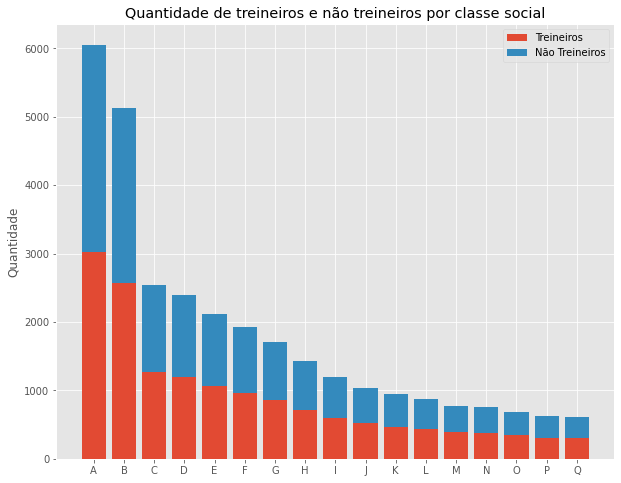

In [ ]:
n_trei = dados.query('IN_TREINEIRO == 0')['Q006'].value_counts()
trei = dados.query('IN_TREINEIRO == 1')['Q006'].value_counts()

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(renda_ordenada, renda_treineiro, label= 'Treineiros')
ax.bar(renda_ordenada, renda_nao_treineiro, bottom=renda_treineiro, label= 'Não Treineiros')

ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de treineiros e não treineiros por classe social')
ax.legend()

plt.show()

Text(0.5, 1.0, 'Boxplot das notas de total pela renda')

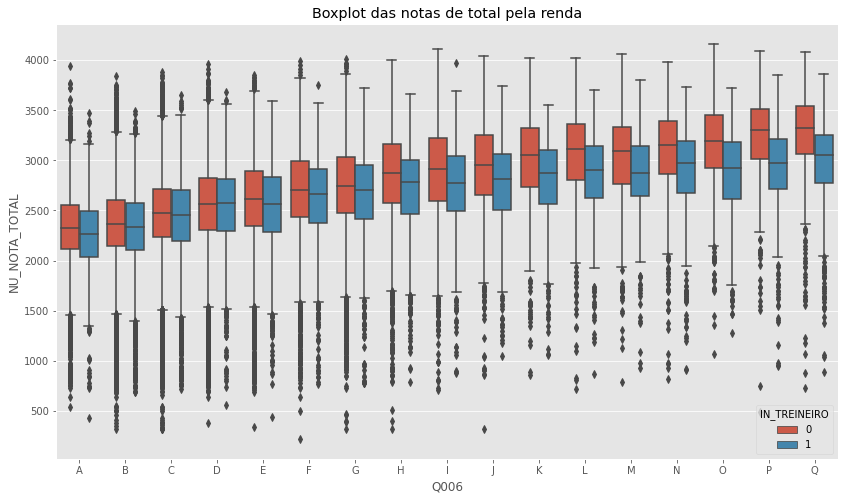

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero, 
            hue = "IN_TREINEIRO", order = renda_ordenada)
plt.title("Boxplot das notas de total pela renda")
#Sendo 1 TREINEIRO e 0 Não Treineiros

Já da para perceber que quanto maior a Renda menor são os números de pessoas que fazem o Enem como treineiros, podemos levantar hipóteses que essas pessoas conseguem um maior acesso a cursos preparatórios ou possuem uma maior qualidade de ensino. 
 
Podemos olhar quais estados possuem menores de 18 anos fazendo o Enem
 


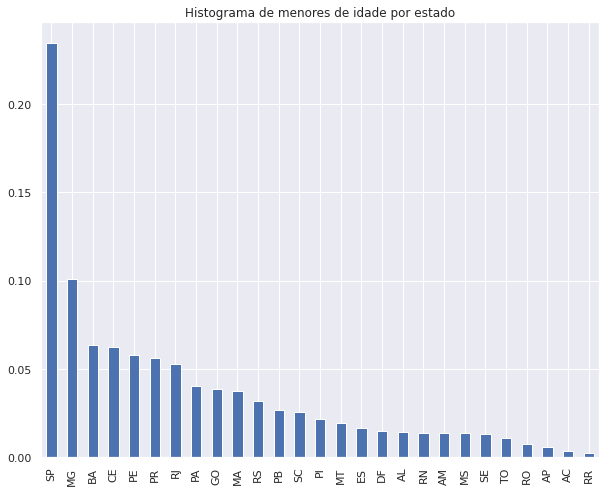

In [ ]:
dados.query("NU_IDADE < 18")["SG_UF_RESIDENCIA"].value_counts(normalize = True).plot.bar(figsize=(10,8),
                                                                                         grid=True, title='Histograma de menores de idade por estado')

Os aspectos que podem influenciar os treineiros e não treineiros é em primeiro a população daquele estado e a cultura (alguns estados podem ser influenciados por olimpiadas da matemática ou ), visto que o Ceará possui mais treineiros que o Rio de Janeiro, porém a população do Rio é maior que a de são paulo.

In [ ]:
# Aula 01 - Desafio 01: Proporção dos inscritos por idade.
idades = dados["NU_IDADE"].value_counts(normalize=True).sort_index()
idades_prop = idades.apply(lambda value: "{:.2f}%".format(value))
idades_dict = {
    'idade':idades.index,
    'proporcao':idades.values,
    'proporcao_porcentagem': idades_prop.values 
}

df_idade = pd.DataFrame(data=idades_dict)
dados['NU_IDADE'].describe()

count    127380.000000
mean         22.094355
std           7.498707
min          13.000000
25%          18.000000
50%          19.000000
75%          24.000000
max          82.000000
Name: NU_IDADE, dtype: float64

Ao verificarmos algumas informações estatísticas relativas às idades, observamos que a idade média encontrada neste dataset é de 22 anos.

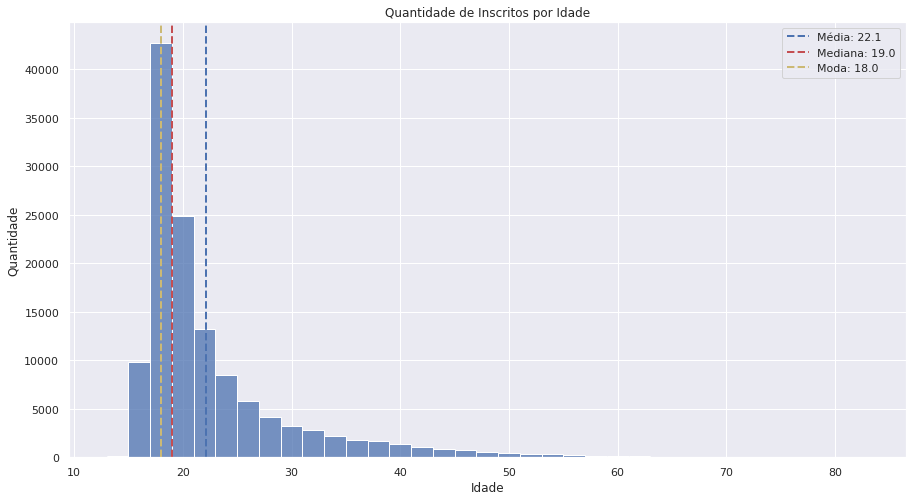

In [ ]:
sns.set()
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_title("Quantidade de Inscritos por Idade")
sns.histplot(ax= ax, data=dados, x = 'NU_IDADE', binwidth=2)
    
mean = dados['NU_IDADE'].mean()
median = dados['NU_IDADE'].median()
mode = dados['NU_IDADE'].mode()[0]

ax.axvline(mean, color='b', linewidth=2, linestyle='--', label='Média: {:.1f}'.format(mean))
ax.axvline(median, color='r', linewidth=2, linestyle='--', label='Mediana: {:.1f}'.format(median))
ax.axvline(mode, color='y', linewidth=2, linestyle='--', label='Moda: {:.1f}'.format(mode))
ax.set_xlabel('Idade')
ax.set_ylabel('Quantidade')
ax.legend(loc=0)
plt.show()

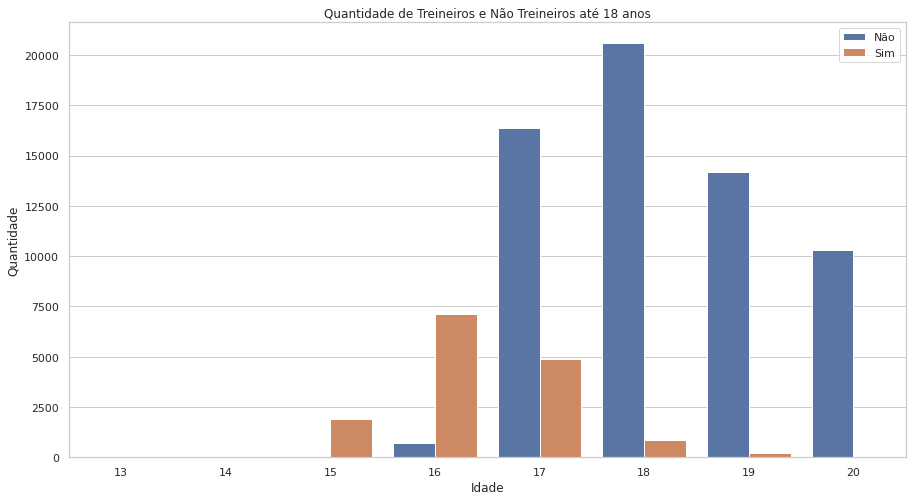

In [ ]:
plt.figure(figsize=(15, 8))
sns.set()
sns.set_style("whitegrid")
ax = sns.countplot(x="NU_IDADE", data = dados.query("NU_IDADE <= 20"), hue="IN_TREINEIRO")
ax.set_xlabel('Idade')
ax.set_ylabel('Quantidade')
ax.legend(['Não', 'Sim'])
ax.set_title("Quantidade de Treineiros e Não Treineiros até 18 anos")
plt.show()

Podemos notar que ao se aproximar da idade acima dos 18 anos, quando á a maior taxa de ingresso na faculdade o número de treineiros fica quase nulo, sendo que aos 20 anos é praticamente nulo.

##Sexo

Proporção entre os sexos e análise da relação da Cor/Raça pelo Sexo

In [ ]:
dados_sem_notas_zero['TP_SEXO'].value_counts(normalize=True)

F    0.596103
M    0.403897
Name: TP_SEXO, dtype: float64

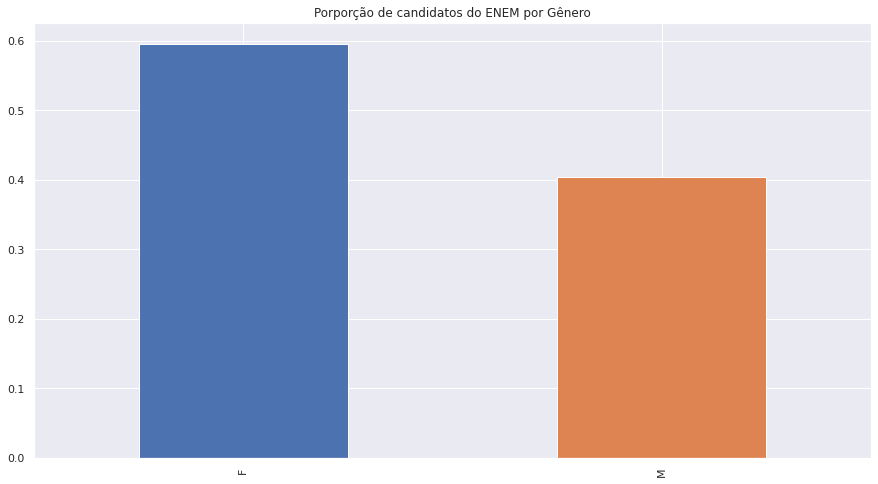

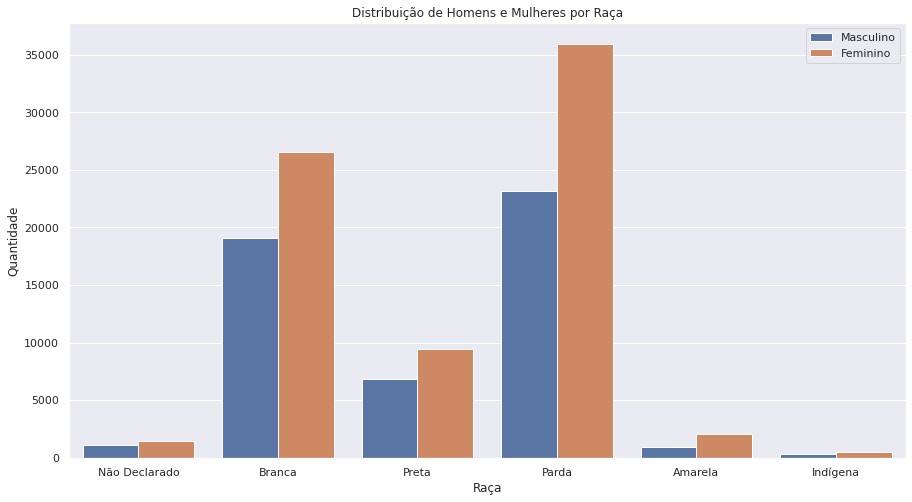

In [ ]:
plt.figure(figsize=(15,8))
dados_sem_notas_zero['TP_SEXO'].value_counts(normalize=True).plot.bar(color=sns.color_palette(), title='Porporção de candidatos do ENEM por Gênero')

racas = ['Não Declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
plt.figure(figsize=(15,8))
sns.set()
ax = sns.countplot(data=dados, x='TP_COR_RACA', hue="TP_SEXO")
ax.set_title('Distribuição de Homens e Mulheres por Raça')
ax.set_xlabel('Raça')
ax.set_ylabel('Quantidade')
ax.set_xticklabels(racas)
ax.legend(['Masculino', 'Feminino'])
plt.show()

Analisando as notas pelo sexo do participante

Text(0.5, 0, '')

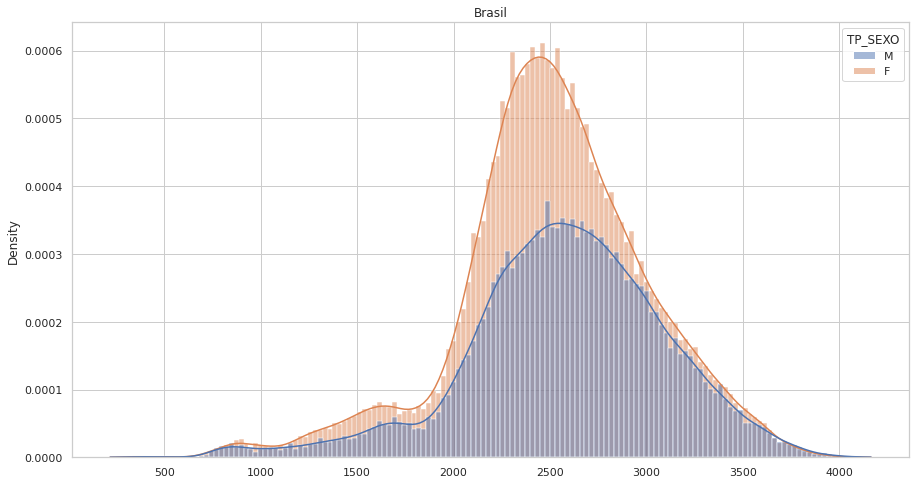

In [ ]:
plt.figure(figsize=(15, 8))
sns.histplot(dados_sem_notas_zero, x='NU_NOTA_TOTAL', hue='TP_SEXO', stat='density', kde=True, hue_order=['M','F'])
plt.title('Brasil')
plt.xlabel('')

Não podemos esquecer de ver pela Renda

Text(0, 0.5, 'Nota')

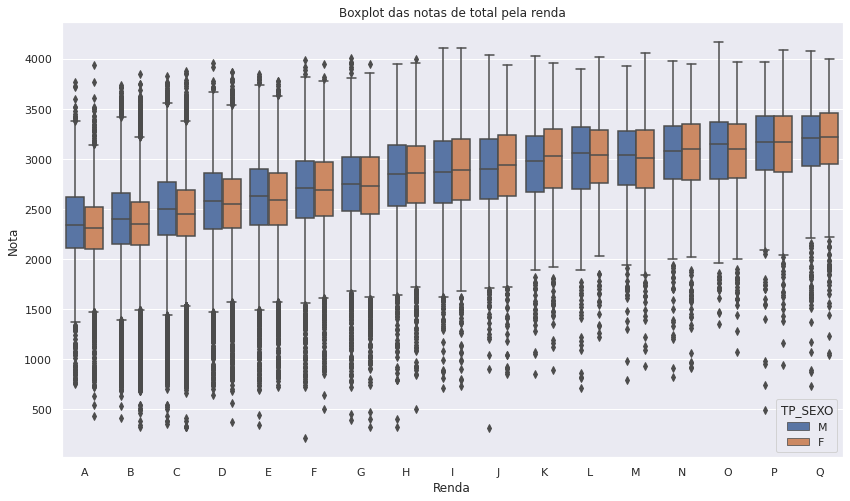

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero, 
            hue = "TP_SEXO", order = renda_ordenada)
plt.title("Boxplot das notas de total pela renda")
plt.xlabel('Renda')
plt.ylabel('Nota')

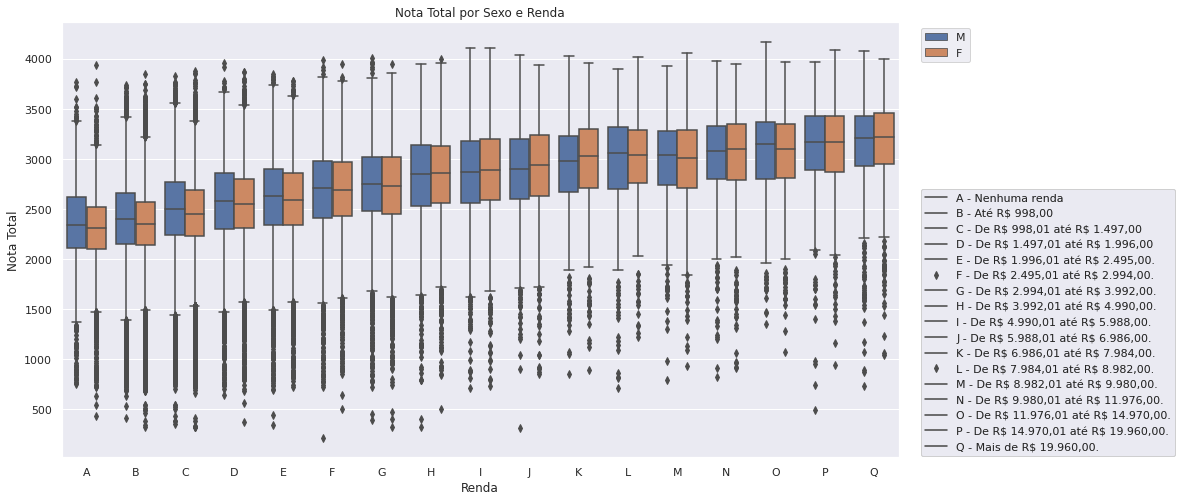

In [ ]:
descricao_renda = [
  'A - Nenhuma renda', 'B - Até R$ 998,00','C - De R\$ 998,01 até R\$ 1.497,00','D - De R\$ 1.497,01 até R\$ 1.996,00',
  'E - De R\$ 1.996,01 até R\$ 2.495,00.','F - De R\$ 2.495,01 até R\$ 2.994,00.','G - De R\$ 2.994,01 até R\$ 3.992,00.','H - De R\$ 3.992,01 até R\$ 4.990,00.',
  'I - De R\$ 4.990,01 até R\$ 5.988,00.','J - De R\$ 5.988,01 até R\$ 6.986,00.','K - De R\$ 6.986,01 até R\$ 7.984,00.','L - De R\$ 7.984,01 até R\$ 8.982,00.',
  'M - De R\$ 8.982,01 até R\$ 9.980,00.','N - De R\$ 9.980,01 até R\$ 11.976,00.','O - De R\$ 11.976,01 até R\$ 14.970,00.','P - De R\$ 14.970,01 até R\$ 19.960,00.',
  'Q - Mais de R\$ 19.960,00.'
]

# descricao_renda = [fr"{i}" for i in descricao_renda]
# descricao_renda
plt.figure(figsize=(15, 8))

ax = sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero, hue = "TP_SEXO", order = renda_ordenada)
ax.set_xlabel('Renda')
ax.set_ylabel('Nota Total')
ax.set_title("Nota Total por Sexo e Renda")

legenda_sexo = plt.legend(bbox_to_anchor=(1.02, 1.0))
legenda_renda =  plt.legend(bbox_to_anchor=(1.02, 0.63), labels=descricao_renda)

plt.gca().add_artist(legenda_sexo)
plt.gca().add_artist(legenda_renda)

plt.show()

Podemos analisar que o fator principal da difrença entre notas do sexo masculino e feminino vem do fator culturla onde as mulheres dedicam mais horas aos afazeres domésticos e cuidado de pessoas, mesmo em situações ocupacionais iguais a dos homens, o que possivelmente reduz seu tempo para dedicação à outras atividades, como estudar.

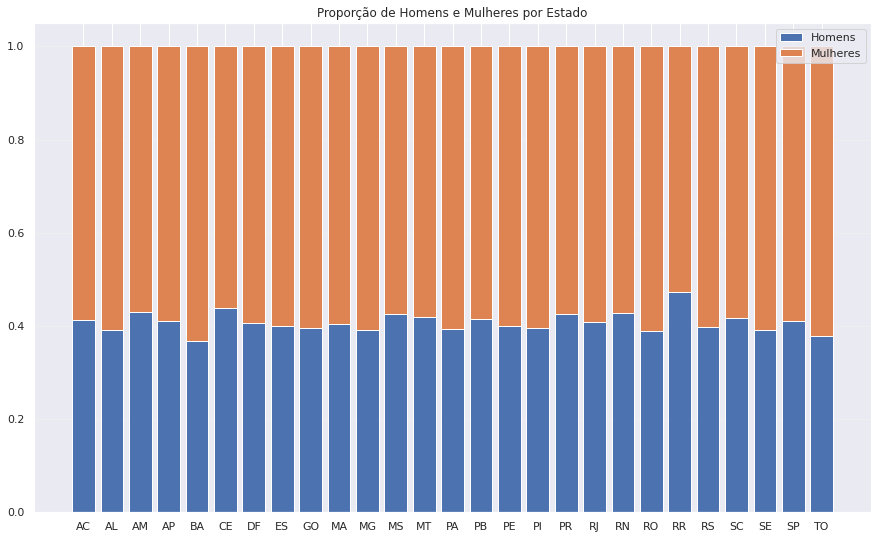

In [ ]:
residencia = dados['SG_UF_RESIDENCIA'].value_counts()
dados_sexo_m = dados.query("TP_SEXO == 'M'")['SG_UF_RESIDENCIA'].value_counts()/residencia
dados_sexo_f = dados.query("TP_SEXO == 'F'")['SG_UF_RESIDENCIA'].value_counts()/residencia
uf = dados.SG_UF_RESIDENCIA.unique()
uf.sort()

fig, ax = plt.subplots(figsize=(15,9))
ax.set_title('Proporção de Homens e Mulheres por Estado')
ax.bar(uf, dados_sexo_m, label='Homens')
ax.bar(uf, dados_sexo_f, bottom=dados_sexo_m, label='Mulheres')
ax.set_xticks(uf)
ax.set_xticklabels(uf)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.legend()

plt.show()

##Questionário Socioêconomico

Uma análise da Renda social entre Homens e mulheres, suas respectivas cores/raças e outros fatores economicos. 

Text(0.5, 1.0, 'Proporção de candidatos do Brasil por classe econômica')

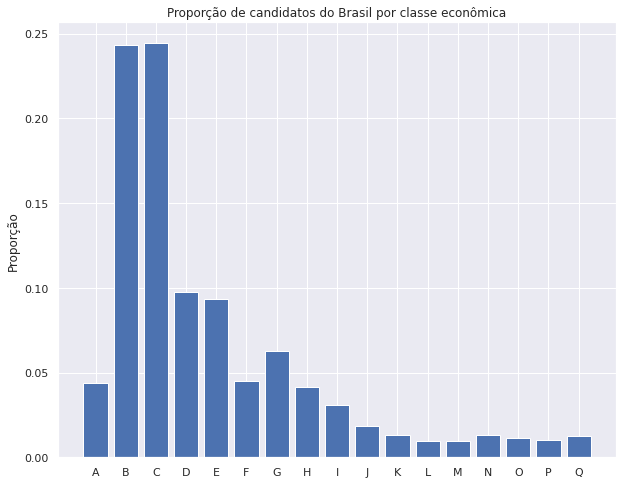

In [ ]:
plt.figure(figsize=(10,8))

plt.bar(renda_ordenada, dados_sem_notas_zero["Q006"].value_counts(normalize=True).sort_index())

plt.ylabel('Proporção')
plt.title('Proporção de candidatos do Brasil por classe econômica')


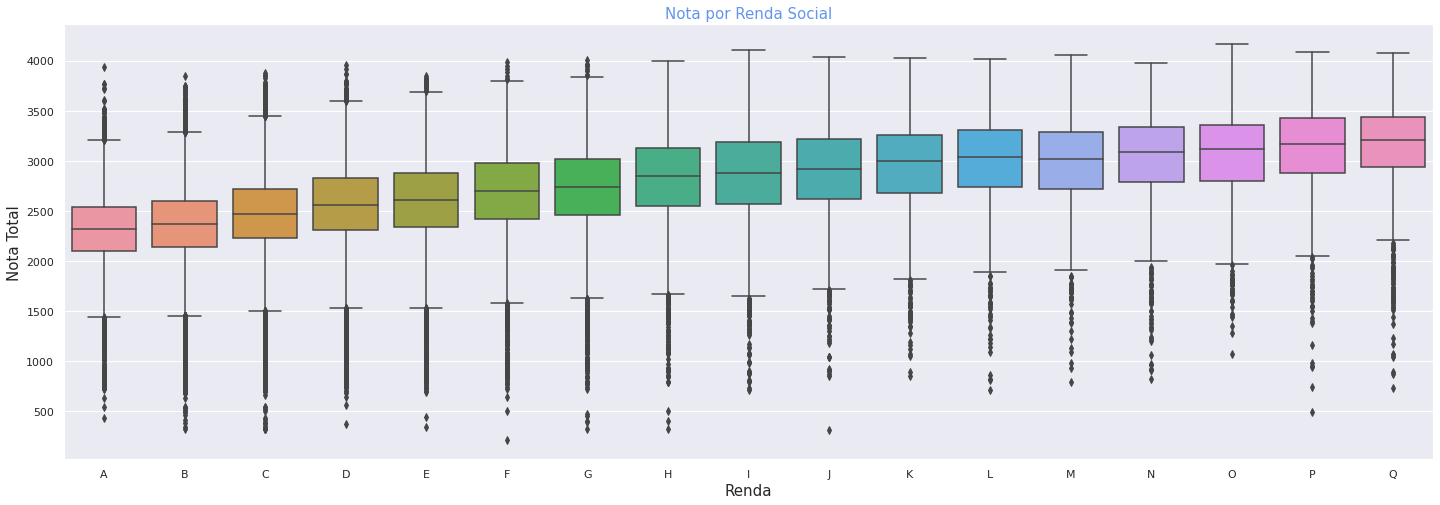

In [ ]:
gera_boxplot_legenda("Q006", "NU_NOTA_TOTAL",dados_sem_notas_zero,"Nota por Renda Social","Nota Total","Renda")

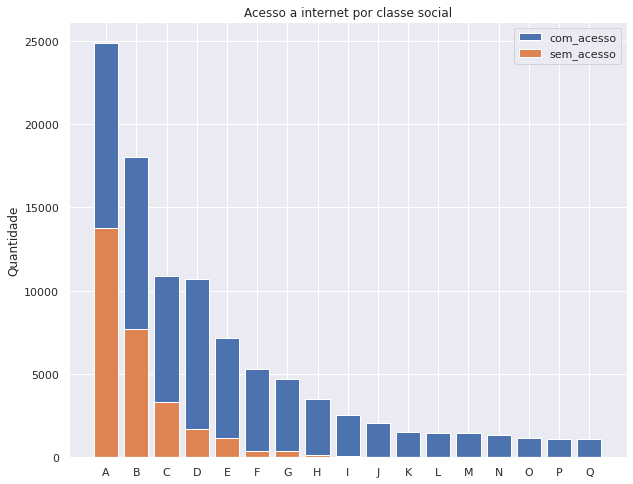

In [ ]:
dados_sem_acesso = dados[(dados["Q025"] == 'A')]
dados_com_acesso = dados[(dados["Q025"] == 'B')]

renda_sem_acesso= dados_sem_acesso["Q006"].value_counts()
renda_com_acesso = dados_com_acesso["Q006"].value_counts()

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(renda_ordenada, renda_com_acesso, label= 'com_acesso')
ax.bar(renda_ordenada, renda_sem_acesso, label= 'sem_acesso')

ax.set_ylabel('Quantidade')
ax.set_title('Acesso a internet por classe social')
ax.legend()

plt.show()

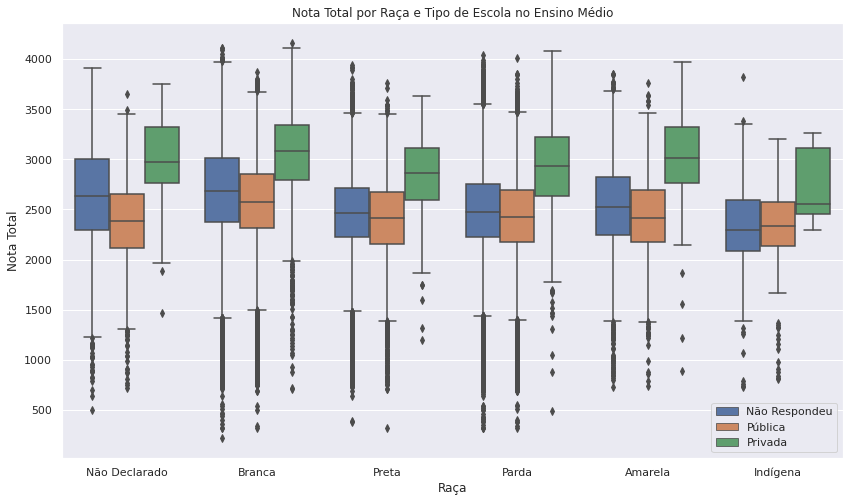

In [ ]:
tipos_escola = ["Não Respondeu","Pública","Privada","Exterior"]
plt.figure(figsize=(14, 8))
ax = sns.boxplot(x="TP_COR_RACA", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero, hue="TP_ESCOLA")
ax.set_xlabel('Raça')
ax.set_ylabel('Nota Total')
ax.set_title("Nota Total por Raça e Tipo de Escola no Ensino Médio")
ax.set_xticklabels(racas)
handles, _ = ax.get_legend_handles_labels() 
ax.legend(handles,tipos_escola)
plt.show()

Text(0.5, 1.0, 'Possui Internet X Renda')

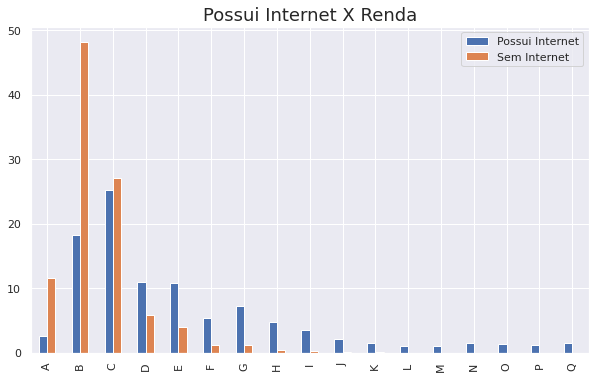

In [ ]:
com_internet = dados.query("Q025=='B'")['Q006'].value_counts(normalize=True).mul(100).sort_index()
sem_internet = dados.query("Q025=='A'")['Q006'].value_counts(normalize=True).mul(100).sort_index()

df = pd.DataFrame({'Possui Internet':com_internet, 'Sem Internet': sem_internet})
ax = df.plot.bar(figsize=(10,6))
ax.set_title('Possui Internet X Renda', fontsize=18)

Nos 3 últimos gráficos acesso a internet,Tipo de Escola no Ensino Médio e se possui carro ou não podem ser fatores que influenciam diretamente a nota do aluno visto que aqueles que possuem um ou mais fatores como acesso a internet, estudou em escola privada e tem um carro vai possuir menos problemas que um aluno que possui acesso a internet, estuda em escola pública e depende do transporte público.

 
Como no último gráfico,onde o número de treineiros sem acesso a internet é quase o dobro dos que possuem acesso, levantando a hipótese que aqueles que não possuem acesso a internet fazem a prova para descobrir como ela é, visto que quando se tem acesso pode achar ela pela internet podem fazer cursos gratuitos/pagos para se preparar pro enem.

# Vamos falar sobre Machine Learning?


In [ ]:
Image(url='http://acervodehogwarts.weebly.com/uploads/1/3/5/5/13555900/3174576_orig.gif')

Já pensou em tentar prever os números da Mega Sena ? eu já, mas hoje vamos tentar prever as notas de matemática com base nas notas das outras provas.

In [ ]:
#Arrumando os nossos dados para o Modelo de 
provas_entrada = ["NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_CN","NU_NOTA_REDACAO"]
prova_saida = "NU_NOTA_MT"
dados_sem_notas_zero = dados_sem_notas_zero[provas].dropna()
x_notas = dados_sem_notas_zero[provas_entrada]
y_notas = dados_sem_notas_zero[prova_saida]

In [ ]:
#Bora botar o nosso modelo para treinar

SEED = 4321
x_treino, x_teste, y_treino, y_teste = train_test_split(x_notas, y_notas, test_size = 0.25, random_state=SEED)

In [ ]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = SEED)
modelo.fit(x_treino, y_treino)
predicoes_matematica = modelo.predict(x_teste)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


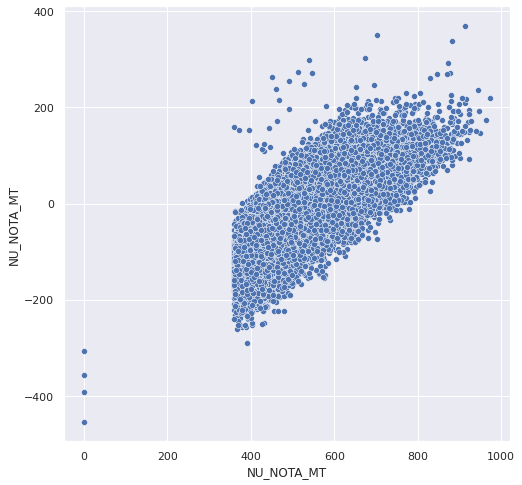

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_teste, y=y_teste - predicoes_matematica)


Podemos perceber que nosso modelo segue um padrão onde para notas altas ele prevê notas altas e para notas baixas.


Agora vamos ver os nossos resultados, vai que o modelo fica tão Bom que a gente consiga usar para adivinhar os numeros da Mega Sena

##Treinamento

In [ ]:
Image(url='https://media.giphy.com/media/UOpdmwKA7la0g/giphy.gif')
#não se torne técnico comigo

In [ ]:
resultados = pd.DataFrame()
resultados["Real"] = y_teste
resultados["Previsao"] = predicoes_matematica
resultados["diferenca"] = resultados["Real"] - resultados["Previsao"]
resultados["quadrado_diferenca"] = (resultados["Real"] - resultados["Previsao"])**2
resultados

,Real,Previsao,diferenca,quadrado_diferenca
114991,459.7,564.486105,-104.786105,10980.127878
104685,617.2,628.305027,-11.105027,123.321625
91028,520.0,509.980986,10.019014,100.380650
115802,703.8,593.681144,110.118856,12126.162420
93303,627.1,579.784588,47.315412,2238.748252
...,...,...,...,...
81393,688.6,626.291851,62.308149,3882.305380
40159,479.1,652.313922,-173.213922,30003.062777
64083,501.4,607.787172,-106.387172,11318.230438
84661,772.5,734.227663,38.272337,1464.771772


Acima temos uma tabela com nossos erros elavados ao quadrado, assim não somos pegos pela nossa mente por achar que os negativos são ruins e positivos bons.

Vamos usar mais algumas funções para avaliar o nosso modelo ?

**Função Score**
 
Na função Score Vamos esperar receber um número que vai de 0.0 a 1.0, onde quanto mais próximo de 1.0, melhor

In [ ]:
treino = modelo.score(x_treino, y_treino)
teste = modelo.score(x_teste, y_teste)
#Mas, não se esqueça que é muito importante que seu modelo não tenha um score absurdamente alto no conjunto de treino, enquanto no de teste ele está bem baixo
print("Medindo os valores de 0 a 1 do score do nosso modelo, temos \n treino: {} \n teste: {}". format(treino,teste))

Medindo os valores de 0 a 1 do score do nosso modelo, temos 
 treino: 0.4416335029257245 
 teste: 0.4524451867824898


##mean_squared_log_error
[Log_erro:](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error)
Perda média de regressão de erro logarítmico ao quadrado

In [ ]:
from sklearn.metrics import mean_squared_log_error # métrica alternativa 1
log_erro = mean_squared_log_error(y_teste, predicoes_matematica).mean()

##Função de score de regressão R^2 (coeficiente de determinação).

[regressão:](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)
A melhor pontuação possível nessa métrica é 1.0 e pode ser negativa (porque o modelo pode ser arbitrariamente pior). Um modelo constante que sempre prevê o valor esperado de y, desconsiderando os recursos de entrada, obteria uma pontuação de R^2 de 0.0.

In [ ]:
from sklearn.metrics import r2_score # métrica alternativa 2
score = r2_score(y_teste, predicoes_matematica).mean()

##median_absolute_error
(Perda de regressão de erro absoluto mediana)

[median_absolute_error:](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.median_absolute_error.html#sklearn.metrics.median_absolute_error) 
Erro Absoluto médio é simplesmente, como o nome sugere, a média dos erros absolutos. O erro absoluto é o valor absoluto da diferença entre o valor previsto e o valor real. Erro absoluto médio mede a precisão para variáveis contínuas

A saída do Erro Absoluto médio  é um ponto flutuante não negativo, O melhor valor é 0.0.

In [ ]:
from sklearn.metrics import median_absolute_error # métrica alternativa 3
erro_absoluta = median_absolute_error(y_teste, predicoes_matematica).mean()

##Resultado das avaliações

In [ ]:
print("""Avaliação do nosso modelo, temos \n 
Log_erro: {} 
score: {} 
erro absoluto: {} """. format(log_erro,score,erro_absoluta))

Avaliação do nosso modelo, temos 
 
Log_erro: 0.031331617158242835 
score: 0.4524451867824898 
erro absoluto: 57.91848536940972 


##Quer conhecer outros modelos de Machine learning??

##Rede Neural MLP de regressão

In [ ]:
modelo_regress = MLPRegressor(random_state=SEED).fit(x_treino, y_treino)
predicoes2_mt = modelo_regress.predict(x_teste)

(-1000.0, 1000.0)

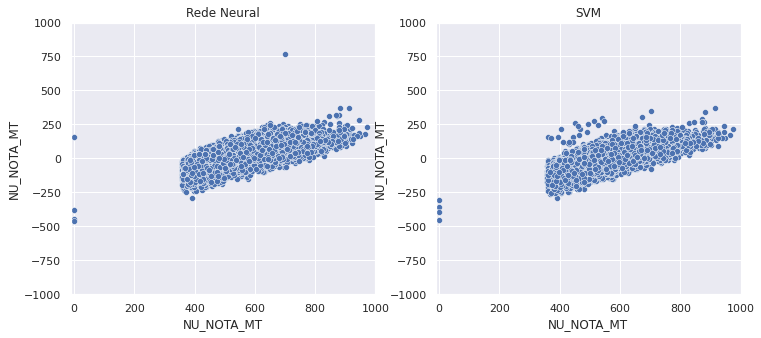

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))

sns.scatterplot(x=y_teste, y=y_teste - predicoes2_mt, ax=axs[0])
axs[0].set_title('Rede Neural')
axs[0].set_xlim(-10, 1000)
axs[0].set_ylim(-1000, 1000)

sns.scatterplot(x=y_teste, y=y_teste - predicoes_matematica, ax=axs[1])
axs[1].set_title('SVM')
axs[1].set_xlim(-10, 1000)
axs[1].set_ylim(-1000, 1000)

##Linear Regression

Text(0.5, 1.0, 'LinearRegression')

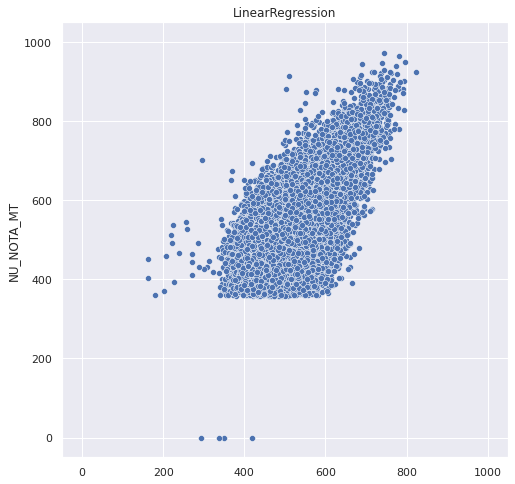

In [ ]:
modelo_lr = LinearRegression()
modelo_lr.fit(x_treino, y_treino)
predicoes_matematica = modelo_lr.predict(x_teste)

plt.figure(figsize=(8,8))
sns.scatterplot(x=predicoes_matematica, y=y_teste)
plt.xlim((-50,1050))
plt.ylim((-50,1050))
plt.title("LinearRegression")


In [ ]:
resultados = pd.DataFrame()
resultados["Real"] = y_teste
resultados["Previsao"] = predicoes_matematica
resultados["diferenca"] = resultados["Real"] - resultados["Previsao"]
resultados["quadrado_diferenca"] = (resultados["Real"] - resultados["Previsao"])**2
resultados

,Real,Previsao,diferenca,quadrado_diferenca
114991,459.7,538.001248,-78.301248,6131.085489
104685,617.2,609.727861,7.472139,55.832863
91028,520.0,487.444227,32.555773,1059.878331
115802,703.8,569.129404,134.670596,18136.169449
93303,627.1,561.309031,65.790969,4328.451642
...,...,...,...,...
81393,688.6,602.279709,86.320291,7451.192655
40159,479.1,629.342491,-150.242491,22572.805986
64083,501.4,584.245996,-82.845996,6863.459119
84661,772.5,720.901846,51.598154,2662.369527


##cross_validate/KFold

In [ ]:
provas_entrada = ["NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_CN","NU_NOTA_REDACAO"]
prova_saida = "NU_NOTA_MT"
dados_sem_notas_zero = dados_sem_notas_zero[provas].dropna()
notas_entrada = dados_sem_notas_zero[provas_entrada]
notas_saida = dados_sem_notas_zero[prova_saida]

x = notas_entrada
y = notas_saida 

In [ ]:
from sklearn.tree import DecisionTreeRegressor

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25)
modelo_arvore = DecisionTreeRegressor(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
predicoes_matematica_arvore = modelo_arvore.predict(x_teste)
mean_squared_error(y_teste, predicoes_matematica_arvore)

6067.243237998922

In [ ]:
from sklearn.model_selection import cross_validate

modelo_arvore = DecisionTreeRegressor(max_depth=2)
resultados = cross_validate(modelo_arvore, x, y, cv= 10, scoring="neg_mean_squared_error")
media = (resultados["test_score"]*-1).mean()
desvio_padrao = (resultados["test_score"]*-1).std()
lim_inferior = media - (2*desvio_padrao)
lim_superior = media + (2*desvio_padrao)

print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

Intervalo de confiança 6015.722549536813 - 7100.732779780728


In [ ]:
SEED= 1232
np.random.seed(SEED)



partes = KFold(n_splits = 10, shuffle=True)
modelo_arvore = DecisionTreeRegressor(max_depth=3)
resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error")
calcula_mse(resultados)

Intervalo de confiança 5858.741842392759 - 6250.793292491384


In [ ]:
regressor_arvore(4)
for i in range(1,21):
    regressor_arvore(i)

Treino = 5760.834451245899|Teste = 5815.707286597402
Treino = 7844.952652412207|Teste = 7857.871770206351
Treino = 6527.783475408351|Teste = 6556.886287657656
Treino = 6021.275229419075|Teste = 6054.767567442072
Treino = 5760.834451245899|Teste = 5815.707286597402
Treino = 5598.158955426787|Teste = 5675.196789060744
Treino = 5469.677369145869|Teste = 5593.304363812442
Treino = 5369.458309852721|Teste = 5541.646599457925
Treino = 5276.16965707928|Teste = 5542.053091078966
Treino = 5166.713159932668|Teste = 5608.390265709719
Treino = 5022.598049115693|Teste = 5761.4934268457555
Treino = 4833.560706021637|Teste = 5955.331403579403
Treino = 4598.125022484774|Teste = 6217.553668629227
Treino = 4316.3791662866815|Teste = 6521.403312280134
Treino = 4000.6209880837496|Teste = 6853.984106997142
Treino = 3655.8197526274853|Teste = 7224.863053512405
Treino = 3295.832684540846|Teste = 7636.168819779455
Treino = 2931.7212612043877|Teste = 8071.851486256819
Treino = 2575.59534021339|Teste = 8452.126

#SEU ESTADO(Pesquise pela Sigla do seu Estado e veja uma análise rápida)

link para rodar [clique aqui](https://colab.research.google.com/drive/1822ibmVMMlTcFipq8OlMBg7OwlxekXTP?usp=sharing)

In [ ]:
dados["SG_UF_RESIDENCIA"].unique()

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

UF (coloca tudo em maiúsculo por favor): 
SP


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


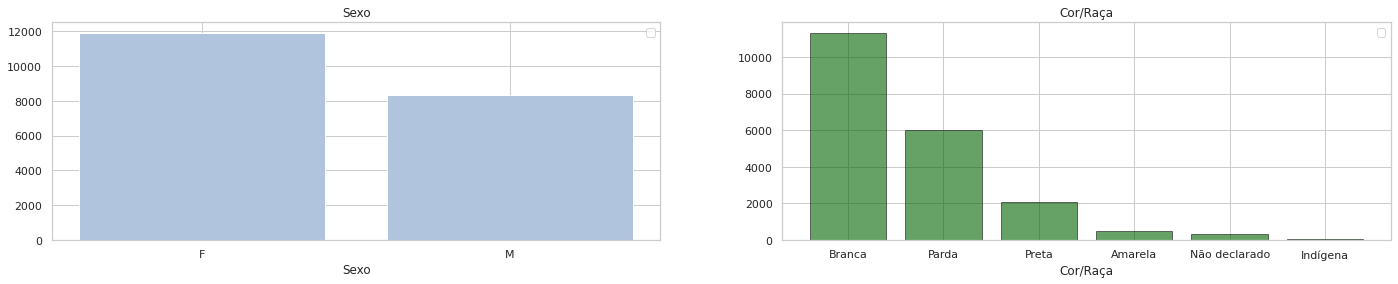

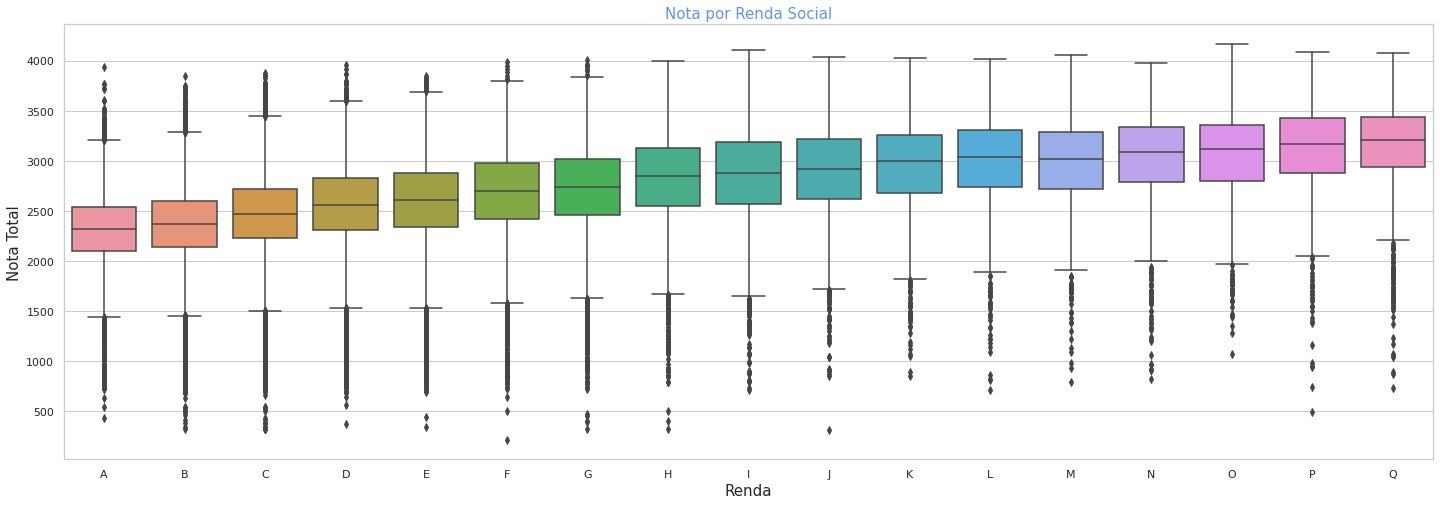

In [ ]:
#importante bibliotecas que vamos utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sys
from IPython.display import Image
def gera_boxplot_legenda(eixo_x,eixo_y, dados,titulo, leganda_x, legenda_y):
    plt.figure(figsize=(54, 8))
    plt.subplot(1, 2, 1)
    sns.boxplot(x= eixo_x, y = eixo_y, data =dados,order= renda_ordenada)
    plt.title(titulo, size = 15, color = "#6495ED")
    plt.ylabel(leganda_x, size = 15)
    plt.xlabel(legenda_y, size = 15)
    
def seu_estado():
  count = dados_estado["TP_SEXO"].value_counts().values
  sexo = dados_estado["TP_SEXO"].value_counts().index

  #ordenando a renda da menor para maior, sendo que A é a menor renda e Q a maior
  renda_ordenada = dados_estado["Q006"].unique()
  renda_ordenada.sort()

  provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
  dados_estado[provas].sum()

  dados_estado["NU_NOTA_TOTAL"] = dados_estado[provas].sum(axis=1)

  dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")

  plt.figure(figsize = (24, 4))
  plt.subplot(1, 2, 1)
  plt.bar(sexo, count,color = "#B0C4DE")
  plt.xlabel("Sexo")
  plt.title("Sexo")
  plt.legend()

  dados_estado['TXT_COR_RACA']=pd.cut(
    dados_estado['TP_COR_RACA'],
    bins=[-1, 0, 1, 2, 3, 4, 5],
    labels=['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
  )

  count_cor = dados_estado["TXT_COR_RACA"].value_counts().values
  cor_raca = dados_estado["TXT_COR_RACA"].value_counts().index

  plt.subplot(1, 2, 2)
  plt.bar(cor_raca, count_cor, ec = "k", alpha = .6, color = "#006400")
  plt.xlabel("Cor/Raça")
  plt.title("Cor/Raça")
  plt.legend()

  gera_boxplot_legenda("Q006", "NU_NOTA_TOTAL",dados_sem_notas_zero,"Nota por Renda Social","Nota Total","Renda")

#nosso banco de dados

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
dados.head()

count = dados["TP_SEXO"].value_counts().values
sexo = dados["TP_SEXO"].value_counts().index

#ordenando a renda da menor para maior, sendo que A é a menor renda e Q a maior
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()

provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
dados[provas].sum()

dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)

dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")

UF = str(input("UF (coloca tudo em maiúsculo por favor): \n"))

dados_estado = dados.query('SG_UF_RESIDENCIA == "{}" '.format(UF))
seu_estado()

# Nova seção

In [ ]:
#FIM

Image(url='https://media.giphy.com/media/MENRy9Cqnonhm/giphy.gif')